# Hypothesis Testing

In [1]:

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)




## Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize   must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners     and losers there are.
   - Theory: Our population is the 1000 tickets we have manufactured
   - Implementation: Create a boolean pandas Series
       - we model win with true and lose with false
       - because of this, we can take the mean of a series to measure the likelihood of winning



The actual probability of winning is 0.25


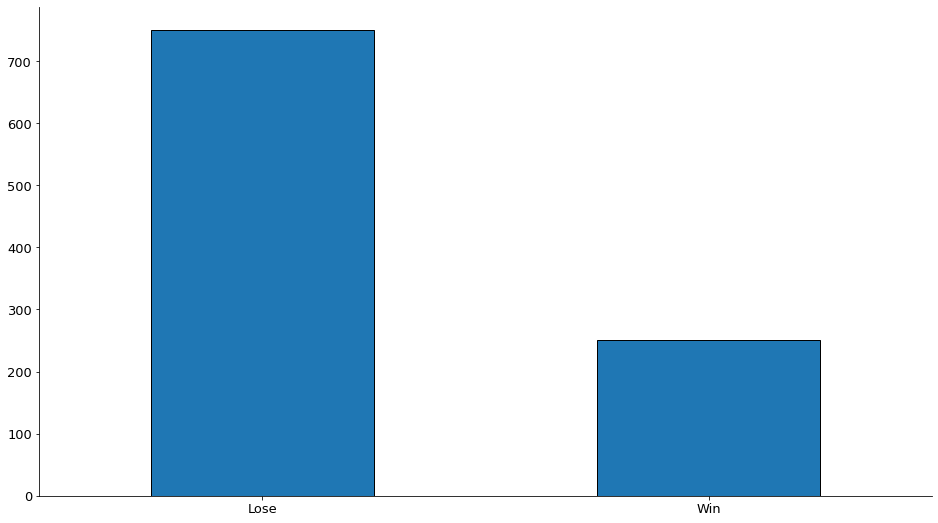

In [2]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

## Scenario: Each student in a classroom is given a Golden Cody scratch off at random
## Theory

We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

   - non-response: people that don't respond are a diff population
   - undercoverage: some groups aren't well represented
   - voluntary: people volunteer for surveys
   - leading questions
   - social desirability
   
- Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [3]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate     the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different   
  numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5       
  numbers produced represents the calculated winrate for one classroom of 25 students.

In [4]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

- Theory
    
    The win rates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

     If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

     That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution
     
     
- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

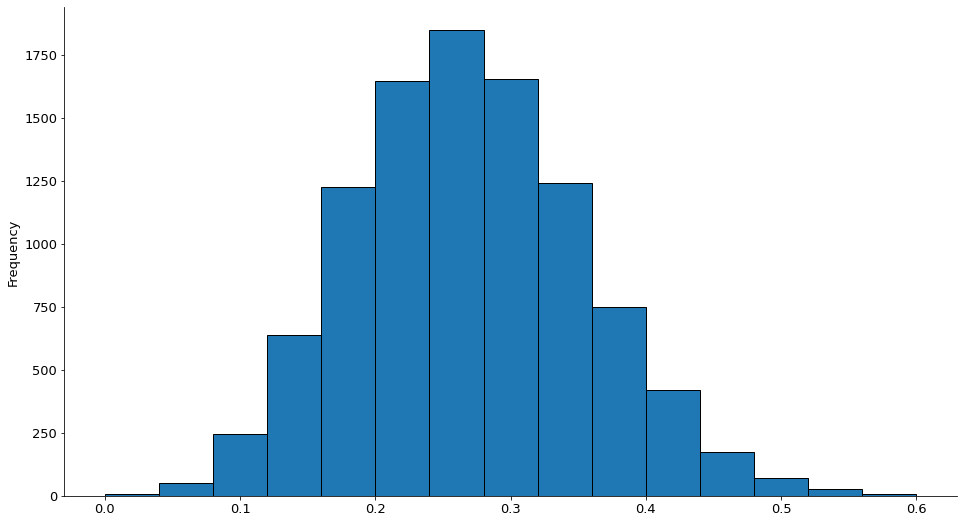

In [5]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)



   - Theory

    The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

    The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.




Mini Exercise -- CLT

   -- Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
   -- Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
   -- Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

   - Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

   - the mean of the sampling distribution of the sample means will be the "true" mean
   - the variance of the sampling distribution is the population variable divided by the sample size
   - the standard deviation of the sampling distribution is pqn‾‾‾√ (for our example), aka the standard error

In [6]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [7]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


- That the sampling distribution being normally distributed is very powerful and has important implications:

    - confidence intervals for population parameter estimates (e.g. estimating the population mean)

       - as n goes up, interval becomes smaller
       - as certainty goes up, interval becomes larger
       - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the  
         simulations' calculated CIs would contain the true mean)
    
    - hypothesis testing

       - One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is 
         the likelihood we observe a 20% (or smaller) winrate just due to chance?


In [8]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

## Null and Alternative Hypothesis

- H0: status quo: no difference or no effect
- Ha: alternative: there is a difference or effect
- whether Ha is ≠, <, >, determines one-tailed vs two-tailed test
  - < or > == one-tailed
  - ≠ == two-tailed
  
### Hypothesis Testing Results

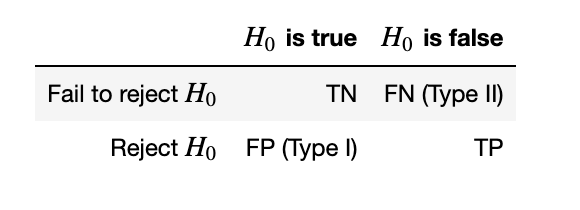

# Null Hypothesis Questions

## 1. Has the network latency gone up since we switched internet service providers?
  

In [9]:
# null hypothesis 
"""
There is no statistically significant difference in network latency time between service providers. 
"""
# alternate hypothesis
"""
There is a statistically significant difference in network latency time between service providers.
"""
# true positive (REJECT the null, and the null is FALSE)
"""
When latency was tested a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) so and must reject the null hypothesis. 
"""
# true negative (ACCEPT the null, and the null is TRUE)
"""
When latency was tested a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) so we fail to reject the null hypothesis.
"""
# type I error (REJECT the null hypothesis, but, in reality, the null hypothesis is TRUE)
"""
When latency was tested a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) but we failed reject the null hypothesis. 
"""
# type II error (ACCEPT the null hypothesis when it is actually FALSE.)
"""
When latency was tested a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) but we rejected the null hypothesis.
"""

'\nWhen latency was tested a p-value greater than our significance level (0.05) was identified.\n(i.e. evidence enough to support the null) but we rejected the null hypothesis.\n'

## 2. Is the website redesign any good?
   

In [10]:
# null hypothesis
"""
There is no statistically significant quantifiable difference between the old and new design.
"""
# alternate hypothesis
"""
There is a statistically significant quantifiable difference between the old and new design.
"""
# true positive
"""
When quantifiable differences were tested a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) so and must reject the null hypothesis.
"""
# true negative
"""
When quantifiable differences were tested a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) so we fail to reject the null hypothesis.
"""
# type I error
"""
When quantifiable differences were tested a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) but we failed reject the null hypothesis.
"""
# type II error
"""
When quantifiable differences were tested a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) but we rejected the null hypothesis.
"""

'\nWhen quantifiable differences were tested a p-value greater than our significance level (0.05) was identified.\n(i.e. evidence enough to support the null) but we rejected the null hypothesis.\n'

## 3.   Is our television ad driving more sales?

In [11]:
# null hypothesis
"""
The ad has not had a statistically significant impact on sales
"""
# alternate hypothesis
"""
The ad has provided a statistically significant impact on sales
"""
# true positive
"""
When sales were examined a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) so and must reject the null hypothesis.
"""
# true negative
"""
When sales were examined a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) so we fail to reject the null hypothesis.
"""
# type I error
"""
When sales were examined a p-value lower than our significance level (0.05) was identified.
(i.e. evidence enough to support the alternative) but we failed reject the null hypothesis.
"""
# type II error
"""
When sales were examined a p-value greater than our significance level (0.05) was identified.
(i.e. evidence enough to support the null) but we rejected the null hypothesis.
"""

'\nWhen sales were examined a p-value greater than our significance level (0.05) was identified.\n(i.e. evidence enough to support the null) but we rejected the null hypothesis.\n'

# T-Test Problems

In [12]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
 - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
 
 - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [13]:
# x1 = office #1
# x2 = office #2

# Mean
xbar1 = 90
xbar2 = 100

#Sales
n1 = 40
n2 = 50

#Standard Deviation
s1 = 15
s2 = 20

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')


t = -2.62523
p = 1.98979


In [14]:
"""
P value is greater than 0.05 so we fail to reject the null:

No statistically significant difference between offices
"""

'\nP value is greater than 0.05 so we fail to reject the null:\n\nNo statistically significant difference between offices\n'

## 2. Load the mpg dataset and use it to answer the following questions:

   - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
   - Are compact cars more fuel-efficient than the average car?
   - Do manual cars get better gas mileage than automatic cars?

In [15]:
mpg = data('mpg')
mpg_data = pd.DataFrame(mpg)
mpg_data['average_mileage'] = (mpg_data.cty + mpg_data.hwy) / 2

In [16]:
bool_series = mpg.year == 2008
oh_eight = mpg[bool_series]

In [17]:
bool_series = mpg.year == 1999
nine_nine = mpg[bool_series]

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
#Plot Distribution, Estabolish Hypothesese, Set Significance, Verify Assumptions, Compute T-Test, Decide

### Plot Distributions

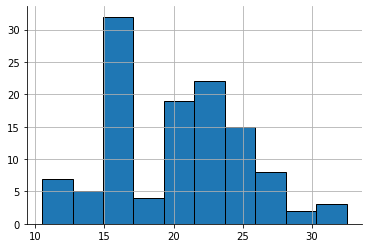

In [41]:
oh_eight['average_mileage'].hist()

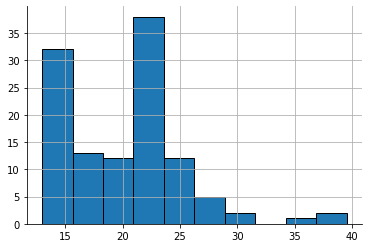

In [42]:
nine_nine['average_mileage'].hist()

### Estabolish Hypotheses
$H_{0}$: Mean fuel efficency of cars in 2008 = Mean fuel efficency of cars in 1999

$H_{a}$: Mean fuel efficency of cars in 2008 != Mean fuel efficency of cars in 1999

### Set Alpha

In [43]:
alpha = .05

###  Verify Assumptions

In [49]:
# of Observations
print(oh_eight.average_mileage.shape)
print(nine_nine.average_mileage.shape)

(117,)
(117,)


In [50]:
# Variance (2 Sample T-Test)
print(oh_eight.average_mileage.var())
print(nine_nine.average_mileage.var())

24.097480106100797
27.122605363984682


### Compute Test Statistic

In [52]:
print(oh_eight.dtypes)
print(nine_nine.dtypes)

manufacturer        object
model               object
displ              float64
year                 int64
cyl                  int64
trans               object
drv                 object
cty                  int64
hwy                  int64
fl                  object
class               object
average_mileage    float64
dtype: object
manufacturer        object
model               object
displ              float64
year                 int64
cyl                  int64
trans               object
drv                 object
cty                  int64
hwy                  int64
fl                  object
class               object
average_mileage    float64
dtype: object


In [53]:
t, p = stats.ttest_ind(oh_eight.average_mileage, nine_nine.average_mileage)
t, p/2

(-0.21960177245940962, 0.4131872020161789)

### Decide

In [54]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  False


In [55]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


# Are compact cars more fuel-efficient than the average car?

In [64]:
# Filtering for compact and average

bool_series_1 = mpg['class'] == 'compact'
compact = mpg[bool_series_1]

bool_series_2 = mpg['class'] != 'compact'
not_compact = mpg[bool_series_2]

In [59]:
#Order of Opperations
'''
Plot Distribution 
Estabolish Hypothesese
Set alpha
Verify Assumptions
Compute T-Test
Decide
'''

'\nPlot Distribution \nEstabolish Hypothesese\nSet Significance\nVerify Assumptions\nCompute T-Test\nDecide\n'

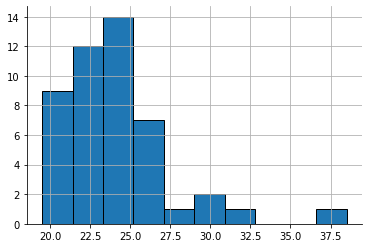

In [65]:
#plot distributions
compact['average_mileage'].hist()

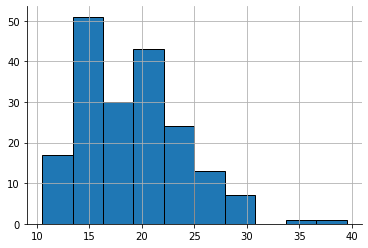

In [66]:
not_compact['average_mileage'].hist()

#Estabolish Hypothesese

𝐻0: Mean fuel efficency of compact cars = Mean fuel efficency of the average car

𝐻𝑎: Mean fuel efficency of compact cars > Mean fuel efficency of the average car

In [67]:
# Set alpha
alpha = .05

In [68]:
# verify assumptions

print(compact.average_mileage.shape)
print(not_compact.average_mileage.shape)

(47,)
(187,)


In [69]:
# Variance (2 Sample T-Test)
print(compact.average_mileage.var())
print(not_compact.average_mileage.var())

12.442876965772433
23.652794548904602


In [70]:
#compute test statistic
t, p = stats.ttest_ind(compact.average_mileage, not_compact.average_mileage)
t, p/2

(6.731177612837954, 6.529560792509067e-11)

In [71]:
# decide

print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [72]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


# Do manual cars get better gas mileage than automatic cars?

In [98]:
# Creating a dataframe for manual automobiles
mpg_m = mpg.trans.str.replace('(m5)', '').str.replace('(m6)', '').str.replace('(', '').str.replace(')', '')
mpg_m = mpg_m == 'manual'
mpg_m_df = mpg[mpg_m]

In [110]:
# Creating a dataframe for automatic automobiles
mpg_a = mpg.trans.str.replace('(av)', '').str.replace('(l5)', '').str.replace('(i4)', '').str.replace('(s6)', '').str.replace('(', '').str.replace(')', '')
mpg_a = mpg_a == 'auto'
mpg_a_df = mpg[mpg_a]


# Correlation Problems

 ## 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?
 

In [20]:
telco = pd.read_csv("telco_data.csv")
telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,contract_details,phone_service_details,internet_details,product_key
0,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,...,True,False,False,3,2020-08-27,#DIV/0!,1 Year,One Line,No Internet Service,1
1,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,...,True,True,True,2,2020-08-27,#DIV/0!,2 Year,Two or More Lines,DSL,1
2,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,...,True,False,False,2,2020-08-27,#DIV/0!,2 Year,One Line,No Internet Service,1
3,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,$25.35,...,True,False,False,3,2020-08-27,#DIV/0!,2 Year,Two or More Lines,No Internet Service,1
4,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,$25.75,...,True,False,False,3,2020-08-27,#DIV/0!,2 Year,Two or More Lines,No Internet Service,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7083-MIOPC,Female,0,No,No,1,0,2,Credit card (automatic),$20.25,...,True,False,False,0,2014-03-27,$20.35,2 Year,One Line,No Internet Service,1
7039,8207-VVMYB,Female,0,Yes,No,2,0,2,Bank transfer (automatic),$26.00,...,True,False,False,1,2014-03-27,$26.06,2 Year,Two or More Lines,No Internet Service,1
7040,6010-DDPPW,Male,0,Yes,No,2,0,2,Bank transfer (automatic),$25.15,...,True,False,False,1,2014-03-27,$25.21,2 Year,Two or More Lines,No Internet Service,1
7041,3910-MRQOY,Female,0,Yes,No,1,0,2,Bank transfer (automatic),$19.40,...,True,False,False,1,2014-03-27,$19.43,2 Year,One Line,No Internet Service,1


In [21]:
telco_s = telco.monthly_charges.str.strip('$')
telco_s = telco_s.astype(float)

In [22]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [23]:
#Does tenure correlate with monthly charges?
"""
H0: There is no significantly significant correlation between tenure and monthly charges
"""
x = telco_s
y = telco.monthly_tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.24717630422486614

In [24]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

21.40491171417203

In [25]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

1.5734423697891632e-98

In [26]:
p < α

True

In [27]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.2471763042248662, 1.5734423697905542e-98)

## P-value is less than alpha, must reject the null (no significant correlation between tenure and monthly charge)

In [28]:
# Does tenure correlate with total charges? 
"""
H0: There is no statistically significant correlation between tenure and total charges.
"""
telco
telco_m = telco.total_charges.str.replace('$', '').str.replace(',', '')
telco_m = telco_m.astype(float)
telco_m = telco_m.fillna(0)
telco_m

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
         ...   
7038    1566.90
7039    2006.95
7040    1940.85
7041    1496.45
7042    1567.00
Name: total_charges, Length: 7043, dtype: float64

In [29]:
n = telco_m.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

x = telco_m
y = telco.monthly_tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

p < α

True

In [30]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8264282488469844, 0.0)

## P-value is less than alpha, must reject the null (no significant correlation between tenure and total charges)

In [31]:
#Does tenure correlate with monthly charges for phone service?
"""
H0: There is no significantly significant correlation between tenure and monthly charges for phone service
"""
# First must make boolean mask for phone service and monthly charges

bool_series = telco.has_phone == True
bool_series
yes_phone = telco[bool_series]
yes_phone
telco_monthly = yes_phone.monthly_charges.str.strip('$')
telco_monthly = telco_monthly.astype(float)
telco_monthly


0       19.70
1       61.90
2       20.25
3       25.35
4       25.75
        ...  
7038    20.25
7039    26.00
7040    25.15
7041    19.40
7042    19.75
Name: monthly_charges, Length: 6361, dtype: float64

In [32]:
# Now make boolean mask for phone service and tenure

bool_series = telco.has_phone == True
bool_series
yes_phone = telco[bool_series]
yes_phone
telco_tenure = yes_phone.monthly_tenure
telco_tenure


0        0
1        0
2        0
3        0
4        0
        ..
7038    77
7039    77
7040    77
7041    77
7042    79
Name: monthly_tenure, Length: 6361, dtype: int64

In [33]:
x = telco_monthly
y = telco_tenure

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

p < α

True

In [34]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24459127886286897, 2.6787677242042115e-87)

## P-value is less than alpha, must reject the null (no significant correlation between tenure and total charges)

In [35]:
#Does tenure correlate with monthly charges for internet service?
"""
H0: There is no significantly significant correlation between tenure and monthly charges for internet service
"""
# First must make boolean mask for internet service

'\nH0: There is no significantly significant correlation between tenure and monthly charges for internet service\n'

In [36]:
telco.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
internet_service            int64
contract_type               int64
payment_type               object
monthly_charges            object
total_charges              object
churn                      object
monthly_tenure              int64
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_and_internet       bool
partner_dependents          int64
start_date                 object
average_monthly_charges    object
contract_details           object
phone_service_details      object
internet_details           object
product_key                 int64
dtype: object

In [37]:
telco.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'monthly_tenure',
       'is_female', 'has_churned', 'has_phone', 'has_internet',
       'has_phone_and_internet', 'partner_dependents', 'start_date',
       'average_monthly_charges', 'contract_details', 'phone_service_details',
       'internet_details', 'product_key'],
      dtype='object')

In [38]:
bool_series = telco.churn == "Yes"
yes_churn = telco[bool_series]

In [39]:
bool_series = telco.churn == "No"
no_churn = telco[bool_series]

 ## 2. Use the employees database.

   - Is there a relationship between how long an employee has been with the company and their salary?
   - Is there a relationship between how long an employee has been with the company and the number of titles they 
     have had?

## 3. Use the sleepstudy data. Is there a relationship between days and reaction time?